# SENTIMENTAL AI
# SnT Summer Project, BCS-IITK
## Assignment-2

Reference- https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()



corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1



# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences =  np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2022-06-16 14:37:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.16, 172.217.0.48, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-06-16 14:37:37 (108 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# A Bidirectional LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary()) #print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1) #change the number of epochs after observing the plots later on at the point where the accuracy saturates

Epoch 1/100
484/484 [==============================] - 57s 105ms/step - loss: 6.8107 - accuracy: 0.0241
Epoch 2/100
484/484 [==============================] - 51s 105ms/step - loss: 6.4313 - accuracy: 0.0316
Epoch 3/100
484/484 [==============================] - 50s 103ms/step - loss: 6.2350 - accuracy: 0.0363
Epoch 4/100
484/484 [==============================] - 50s 104ms/step - loss: 6.0447 - accuracy: 0.0396
Epoch 5/100
484/484 [==============================] - 50s 103ms/step - loss: 5.7976 - accuracy: 0.0501
Epoch 6/100
484/484 [==============================] - 50s 103ms/step - loss: 5.5379 - accuracy: 0.0631
Epoch 7/100
484/484 [==============================] - 50s 103ms/step - loss: 5.2693 - accuracy: 0.0760
Epoch 8/100
484/484 [==============================] - 50s 103ms/step - loss: 4.9988 - accuracy: 0.0896
Epoch 9/100
484/484 [==============================] - 51s 106ms/step - loss: 4.7155 - accuracy: 0.1060
Epoch 10/100
484/484 [==============================] - 50s 103m

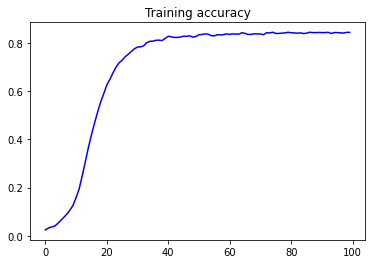

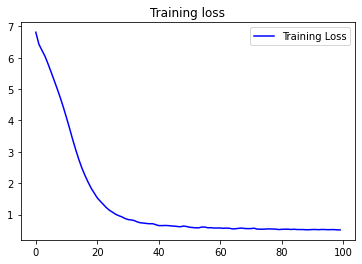

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 80 #Play with this quantity to change the number of words you want to see in the output after the seed_text

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list)
  classes_x = np.argmax(predict_x, axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thy love will befits my love live young thine ' be me alone or me needing call bright behold not green not live so dear nearly do lie with thee still me bright dost lie away tender'd me ' me more nearly are tender'd me bright ' of thee done not still bright dost lie thence more ' not still me bright not abused lie with me swearing swearing thy tomb the world away bent my sight my gain doth
